In [1]:
#import some necessary librairies
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [73]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Column 설명
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius (체감온도)
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [3]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.840,14.395,81,0.000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.020,13.635,80,0.000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.020,13.635,80,0.000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.840,14.395,75,0.000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.840,14.395,75,0.000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.840,12.880,75,6.003,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.020,13.635,80,0.000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.200,12.880,86,0.000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.840,14.395,75,0.000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.120,17.425,76,0.000,8,6,14


In [4]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000
mean,2.507,0.029,0.681,1.418,20.231,23.655,61.886,12.799,36.022,155.552,191.574
std,1.116,0.167,0.466,0.634,7.792,8.475,19.245,8.165,49.960,151.039,181.144
min,1.000,0.000,0.000,1.000,0.820,0.760,0.000,0.000,0.000,0.000,1.000
25%,2.000,0.000,0.000,1.000,13.940,16.665,47.000,7.002,4.000,36.000,42.000
50%,3.000,0.000,1.000,1.000,20.500,24.240,62.000,12.998,17.000,118.000,145.000
75%,4.000,0.000,1.000,2.000,26.240,31.060,77.000,16.998,49.000,222.000,284.000
max,4.000,1.000,1.000,4.000,41.000,45.455,100.000,56.997,367.000,886.000,977.000


In [5]:
test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.660,11.365,56,26.003
1,2011-01-20 01:00:00,1,0,1,1,10.660,13.635,56,0.000
2,2011-01-20 02:00:00,1,0,1,1,10.660,13.635,56,0.000
3,2011-01-20 03:00:00,1,0,1,1,10.660,12.880,56,11.001
4,2011-01-20 04:00:00,1,0,1,1,10.660,12.880,56,11.001
5,2011-01-20 05:00:00,1,0,1,1,9.840,11.365,60,15.001
6,2011-01-20 06:00:00,1,0,1,1,9.020,10.605,60,15.001
7,2011-01-20 07:00:00,1,0,1,1,9.020,10.605,55,15.001
8,2011-01-20 08:00:00,1,0,1,1,9.020,10.605,55,19.001
9,2011-01-20 09:00:00,1,0,1,2,9.840,11.365,52,15.001


In [6]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


+) datetime에 대해서, 시간대 별로 자전거를 빌리려는 수요에 영향을 줄 수 있으므로 새로운 column 만들면? 

-> 시간대만 추출해서 01,02.......23  (00-23)

+) month도 추출 (1-12)

In [7]:
train['time'] = train['datetime'].map(lambda x: x[11:13]).astype(int)
test['time'] = test['datetime'].map(lambda x: x[11:13]).astype(int)
train['month'] = train['datetime'].map(lambda x: x[5:7]).astype(int)
test['month'] = test['datetime'].map(lambda x: x[5:7]).astype(int)

### numerical VS categorical values
* numerical: temp/atemp/humidity/windspeed/time
* categorical : season/holiday/workingday/weather/month

### numerical value

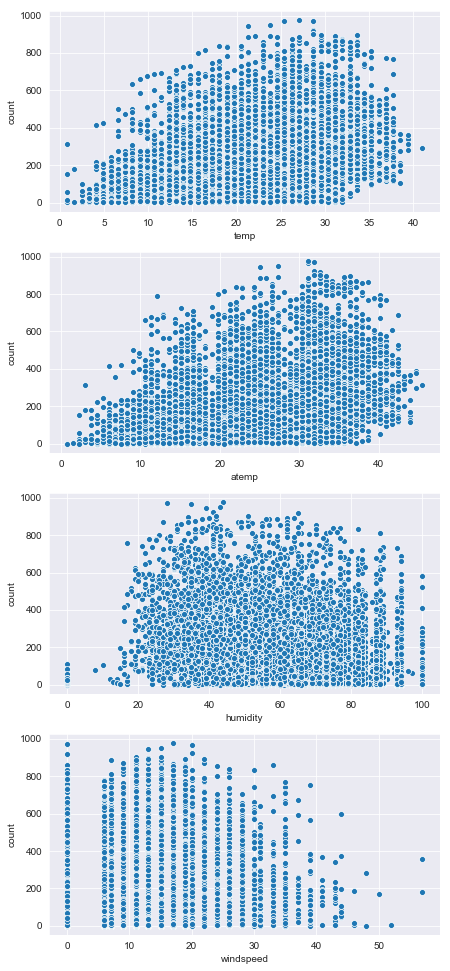

In [8]:
# 수치형 변수와 count 변수간 scatter plot
fig, axs = plt.subplots(4,1, figsize=(7,17))
sns.scatterplot(train['temp'],train['count'],ax=axs[0])
sns.scatterplot(train['atemp'],train['count'],ax=axs[1])
sns.scatterplot(train['humidity'],train['count'],ax=axs[2])
sns.scatterplot(train['windspeed'],train['count'],ax=axs[3])

In [9]:
# 수치형 변수들 skewness 살펴보기
numeric_feats = ['temp','atemp','humidity','windspeed']
# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

,Skew
windspeed,0.589
temp,0.004
humidity,-0.086
atemp,-0.103


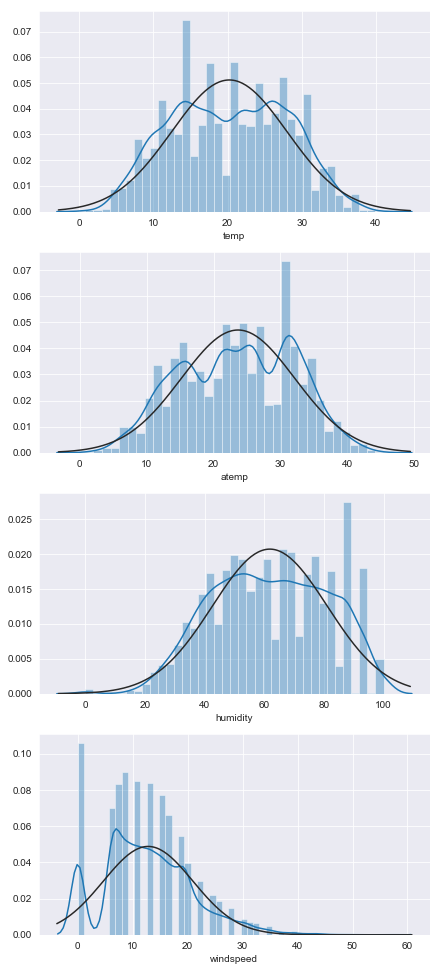

In [10]:
# 수치형 변수 displot
fig, axs = plt.subplots(4,1, figsize=(7,17))
sns.distplot(train['temp'],ax=axs[0],fit=norm)
sns.distplot(train['atemp'],ax=axs[1],fit=norm)
sns.distplot(train['humidity'],ax=axs[2],fit=norm)
sns.distplot(train['windspeed'],ax=axs[3],fit=norm)

### windspeed 범주형으로 바꾸기
##### 기존 데이터 생김새가 numerical이라고 보기엔 다소 어색한 분포도 보이므로, 4개 class 가진 범주형으로 변환
* 0-11 / 12-28 / 29~38 / 39-49 로 나누어 windspeed 강도에 따라 4가지 class로 구분
* (classification of wind speeds , US weather Bureau description) - link 추가하기
* 0: 0-11
* 1: 12-28
* 2: 29-38
* 3: 39~

In [11]:
train['windspeed_categ'] = train['windspeed'].apply(lambda x: 0 if x>=0 and x<=11 
                                                  else (1 if x>=12 and x<=28 else
                                                       (2 if x>=29 and x<=38 else 3)))
test['windspeed_categ'] = test['windspeed'].apply(lambda x: 0 if x>=0 and x<=11 
                                                  else (1 if x>=12 and x<=28 else
                                                       (2 if x>=29 and x<=38 else 3)))

In [12]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,month,windspeed_categ
0,2011-01-01 00:00:00,1,0,0,1,9.840,14.395,81,0.000,3,13,16,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.020,13.635,80,0.000,8,32,40,1,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.020,13.635,80,0.000,5,27,32,2,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.840,14.395,75,0.000,3,10,13,3,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.840,14.395,75,0.000,0,1,1,4,1,0
5,2011-01-01 05:00:00,1,0,0,2,9.840,12.880,75,6.003,0,1,1,5,1,0
6,2011-01-01 06:00:00,1,0,0,1,9.020,13.635,80,0.000,2,0,2,6,1,0
7,2011-01-01 07:00:00,1,0,0,1,8.200,12.880,86,0.000,1,2,3,7,1,0
8,2011-01-01 08:00:00,1,0,0,1,9.840,14.395,75,0.000,1,7,8,8,1,0
9,2011-01-01 09:00:00,1,0,0,1,13.120,17.425,76,0.000,8,6,14,9,1,0


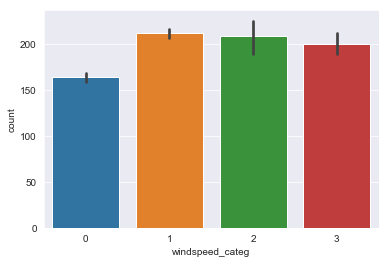

In [13]:
sns.barplot(train['windspeed_categ'],train['count'])

### categorical values 
- season/holiday/workingday/weather/windspeed_categ/month
- barplot / boxplot

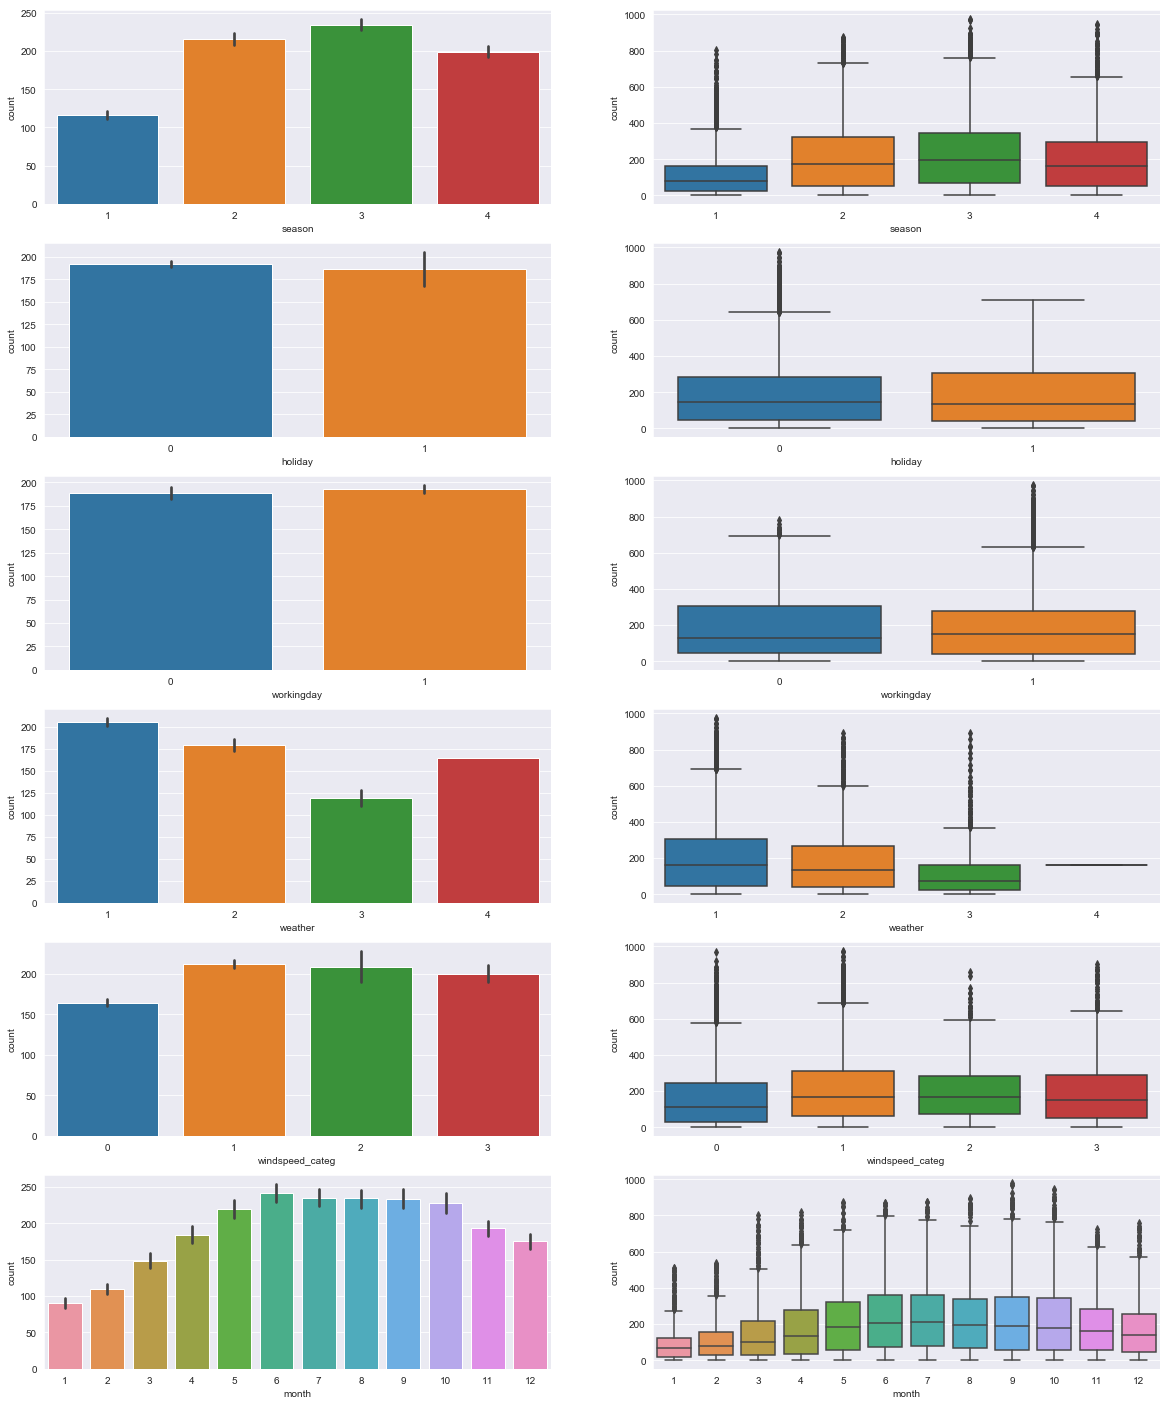

In [14]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20, 25)


sns.barplot(train["season"],train["count"],ax=axes[0][0])
sns.boxplot(train["season"],train["count"],ax=axes[0][1])
sns.barplot(train["holiday"],train["count"],ax=axes[1][0])
sns.boxplot(train["holiday"],train["count"],ax=axes[1][1])
sns.barplot(train["workingday"],train["count"],ax=axes[2][0])
sns.boxplot(train["workingday"],train["count"],ax=axes[2][1])
sns.barplot(train["weather"],train["count"],ax=axes[3][0])
sns.boxplot(train["weather"],train["count"],ax=axes[3][1])
sns.barplot(train["windspeed_categ"],train["count"],ax=axes[4][0])
sns.boxplot(train["windspeed_categ"],train["count"],ax=axes[4][1])
sns.barplot(train["month"],train["count"],ax=axes[5][0])
sns.boxplot(train["month"],train["count"],ax=axes[5][1])

### 상관관계
- temp - atemp 상관관계 0.985로 매우 높음. 하나 drop해주어야.. atemp(체감온도)를 drop하는 것이 나을듯


In [15]:
# casual / registered 변수는 없애줌(어차피 count에 합쳐져서 들어가므로)
train.drop(['casual','registered'],1).corr() #명목형 변수와 count (타겟변수) 간 상관관계가 없는거.. 그래서 decision tree에서는 one-hot을 해야한다...(?)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time,month,windspeed_categ
season,1.000,0.029,-0.008,0.009,0.259,0.265,0.191,-0.147,0.163,-0.007,0.972,-0.060
holiday,0.029,1.000,-0.250,-0.007,0.000,-0.005,0.002,0.008,-0.005,-0.000,0.002,0.009
workingday,-0.008,-0.250,1.000,0.034,0.030,0.025,-0.011,0.013,0.012,0.003,-0.003,-0.008
weather,0.009,-0.007,0.034,1.000,-0.055,-0.055,0.406,0.007,-0.129,-0.023,0.012,0.023
temp,0.259,0.000,0.030,-0.055,1.000,0.985,-0.065,-0.018,0.394,0.145,0.258,0.013
atemp,0.265,-0.005,0.025,-0.055,0.985,1.000,-0.044,-0.057,0.390,0.140,0.264,-0.008
humidity,0.191,0.002,-0.011,0.406,-0.065,-0.044,1.000,-0.319,-0.317,-0.278,0.205,-0.167
windspeed,-0.147,0.008,0.013,0.007,-0.018,-0.057,-0.319,1.000,0.101,0.147,-0.150,0.498
count,0.163,-0.005,0.012,-0.129,0.394,0.390,-0.317,0.101,1.000,0.401,0.167,0.081
time,-0.007,-0.000,0.003,-0.023,0.145,0.140,-0.278,0.147,0.401,1.000,-0.007,0.102


In [16]:
train = train.drop(['casual','registered','atemp'],1)
test = test.drop(['atemp'],1)

In [17]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,time,month,windspeed_categ
0,2011-01-01 00:00:00,1,0,0,1,9.840,81,0.000,16,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.020,80,0.000,40,1,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.020,80,0.000,32,2,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.840,75,0.000,13,3,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.840,75,0.000,1,4,1,0
5,2011-01-01 05:00:00,1,0,0,2,9.840,75,6.003,1,5,1,0
6,2011-01-01 06:00:00,1,0,0,1,9.020,80,0.000,2,6,1,0
7,2011-01-01 07:00:00,1,0,0,1,8.200,86,0.000,3,7,1,0
8,2011-01-01 08:00:00,1,0,0,1,9.840,75,0.000,8,8,1,0
9,2011-01-01 09:00:00,1,0,0,1,13.120,76,0.000,14,9,1,0


### outlier 제거 기준정하기
* IQR
* 평균에서 표준편차*3만큼 떨어진 값들 제거

#### 평균에서 표준편차*3만큼 떨어진 값들 제거

In [18]:
train_2 = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())] 

In [19]:
train_2

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,time,month,windspeed_categ
0,2011-01-01 00:00:00,1,0,0,1,9.840,81,0.000,16,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.020,80,0.000,40,1,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.020,80,0.000,32,2,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.840,75,0.000,13,3,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.840,75,0.000,1,4,1,0
5,2011-01-01 05:00:00,1,0,0,2,9.840,75,6.003,1,5,1,0
6,2011-01-01 06:00:00,1,0,0,1,9.020,80,0.000,2,6,1,0
7,2011-01-01 07:00:00,1,0,0,1,8.200,86,0.000,3,7,1,0
8,2011-01-01 08:00:00,1,0,0,1,9.840,75,0.000,8,8,1,0
9,2011-01-01 09:00:00,1,0,0,1,13.120,76,0.000,14,9,1,0


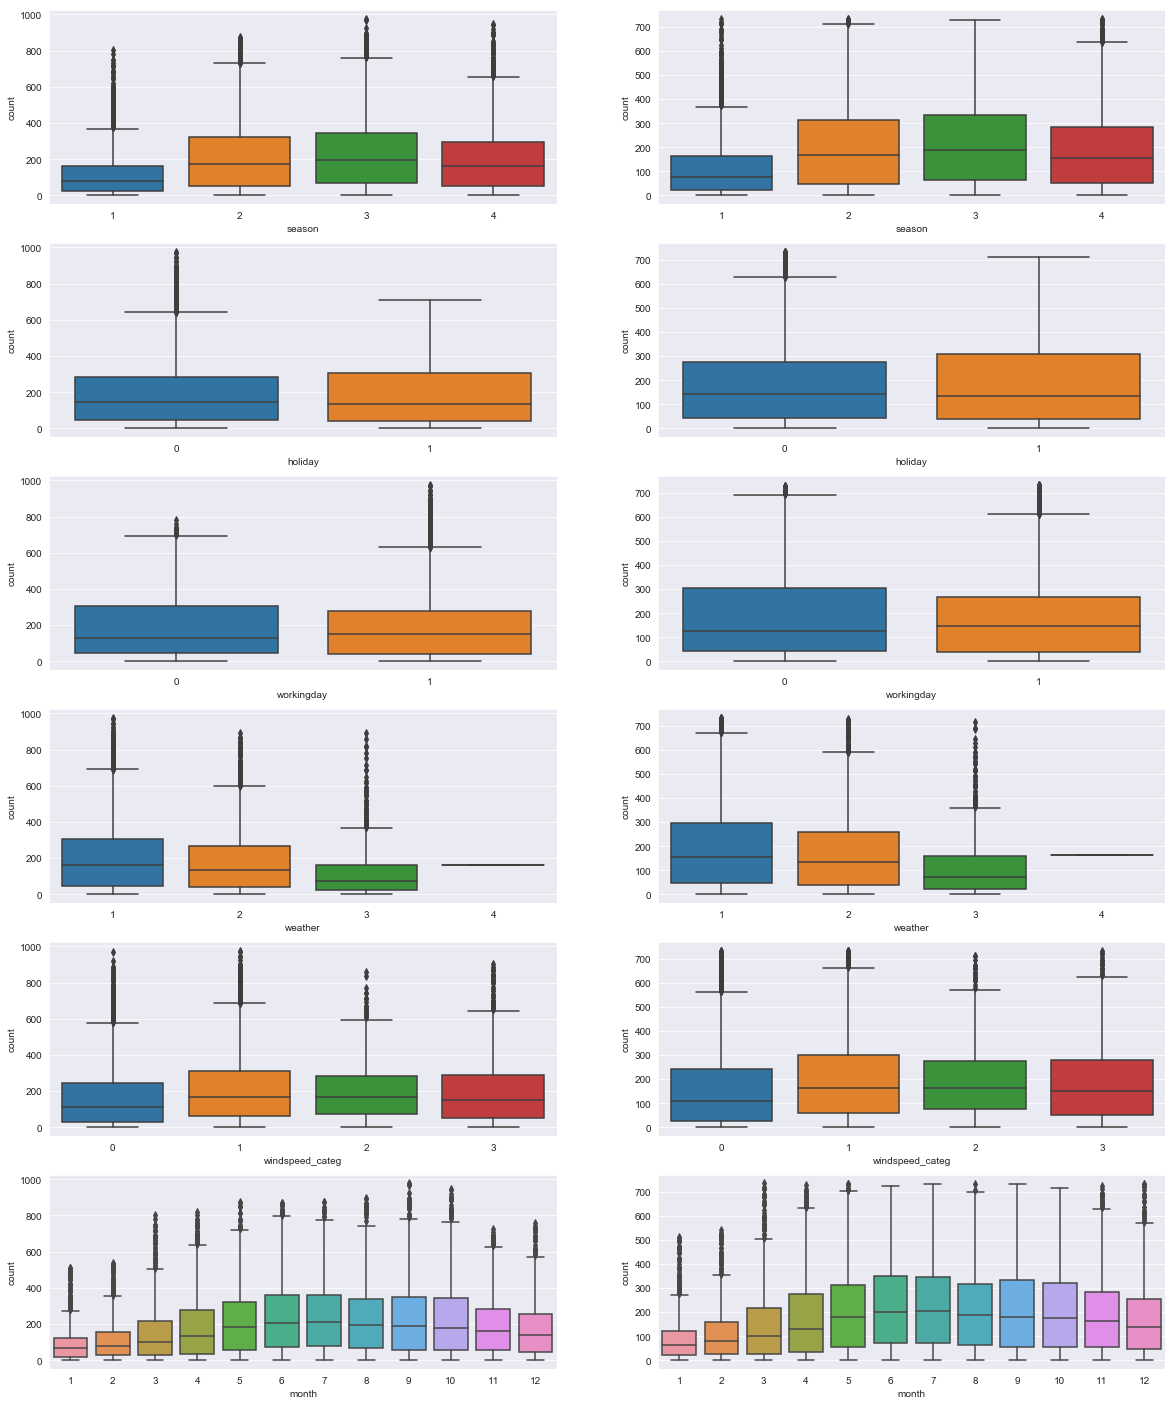

In [20]:
# outlier 제거 이후 비교.

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20, 25)


sns.boxplot(train["season"],train["count"],ax=axes[0][0])
sns.boxplot(train_2["season"],train["count"],ax=axes[0][1])
sns.boxplot(train["holiday"],train["count"],ax=axes[1][0])
sns.boxplot(train_2["holiday"],train["count"],ax=axes[1][1])
sns.boxplot(train["workingday"],train["count"],ax=axes[2][0])
sns.boxplot(train_2["workingday"],train["count"],ax=axes[2][1])
sns.boxplot(train["weather"],train["count"],ax=axes[3][0])
sns.boxplot(train_2["weather"],train["count"],ax=axes[3][1])
sns.boxplot(train["windspeed_categ"],train["count"],ax=axes[4][0])
sns.boxplot(train_2["windspeed_categ"],train["count"],ax=axes[4][1])
sns.boxplot(train["month"],train["count"],ax=axes[5][0])
sns.boxplot(train_2["month"],train["count"],ax=axes[5][1])

#### IQR

In [21]:
Q1 = train['count'].quantile(0.25)
Q3 = train['count'].quantile(0.75)
IQR = Q3-Q1

In [22]:
train_3 = train[(train['count']>(Q1-IQR*1.5))&(train['count']<(Q3+IQR*1.5))]

In [23]:
train_3

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,time,month,windspeed_categ
0,2011-01-01 00:00:00,1,0,0,1,9.840,81,0.000,16,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.020,80,0.000,40,1,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.020,80,0.000,32,2,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.840,75,0.000,13,3,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.840,75,0.000,1,4,1,0
5,2011-01-01 05:00:00,1,0,0,2,9.840,75,6.003,1,5,1,0
6,2011-01-01 06:00:00,1,0,0,1,9.020,80,0.000,2,6,1,0
7,2011-01-01 07:00:00,1,0,0,1,8.200,86,0.000,3,7,1,0
8,2011-01-01 08:00:00,1,0,0,1,9.840,75,0.000,8,8,1,0
9,2011-01-01 09:00:00,1,0,0,1,13.120,76,0.000,14,9,1,0


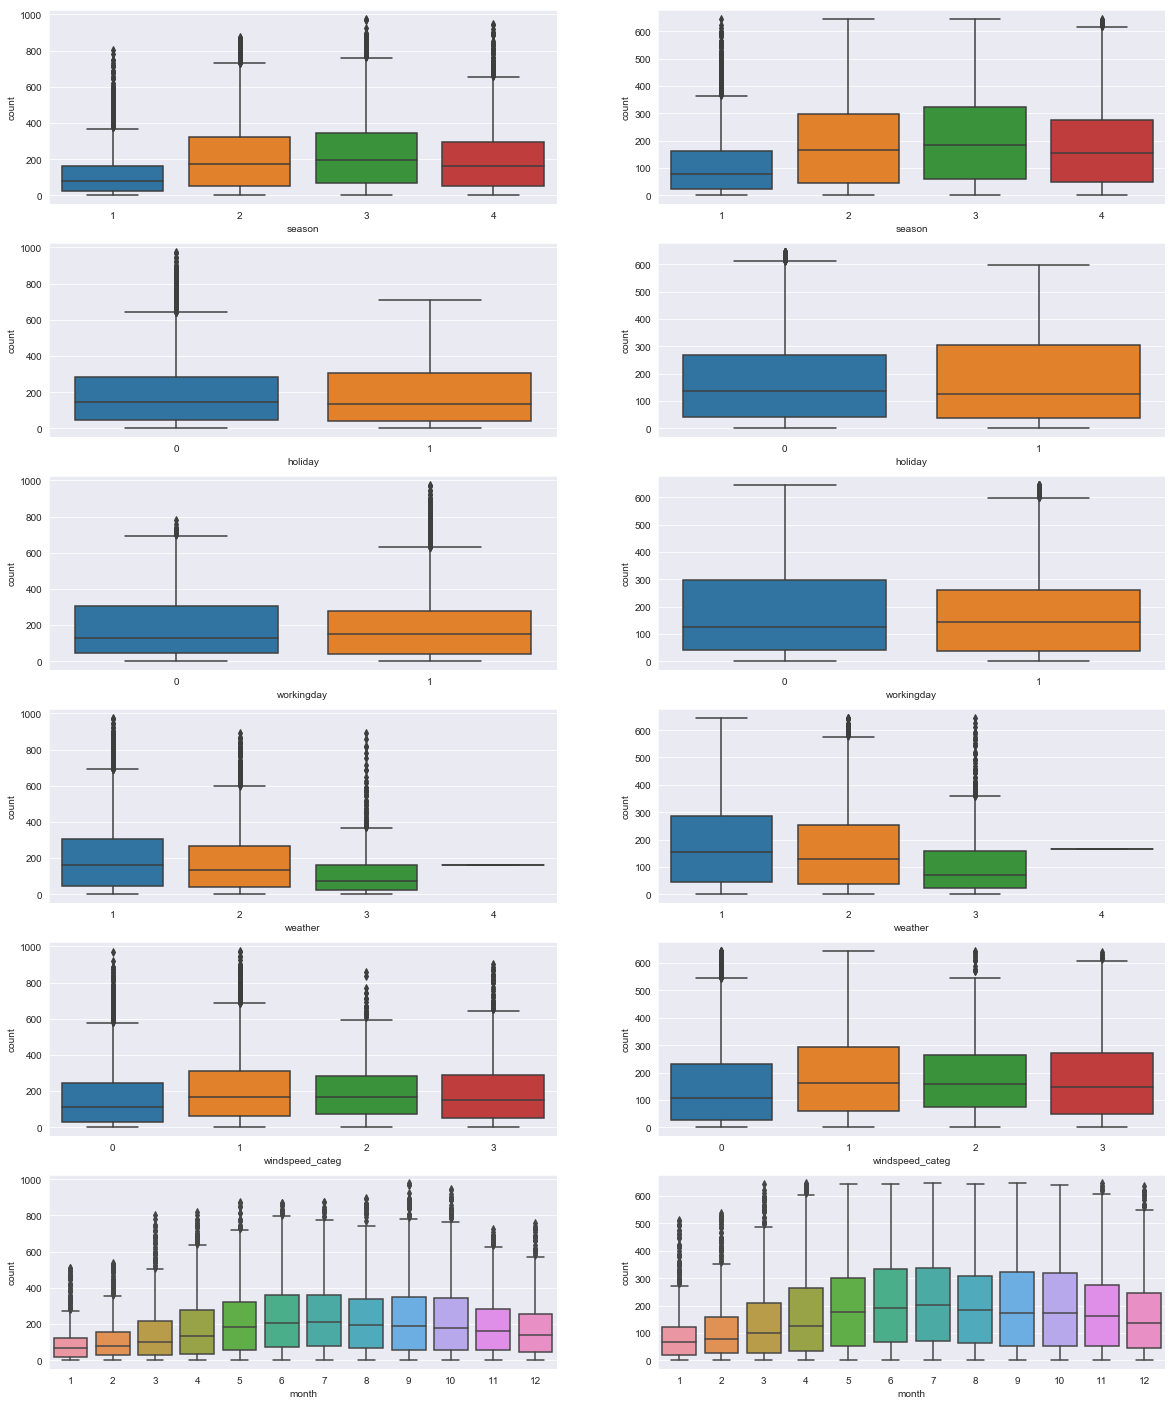

In [24]:
# outlier 제거 이후 비교.

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20, 25)


sns.boxplot(train["season"],train["count"],ax=axes[0][0])
sns.boxplot(train_3["season"],train["count"],ax=axes[0][1])
sns.boxplot(train["holiday"],train["count"],ax=axes[1][0])
sns.boxplot(train_3["holiday"],train["count"],ax=axes[1][1])
sns.boxplot(train["workingday"],train["count"],ax=axes[2][0])
sns.boxplot(train_3["workingday"],train["count"],ax=axes[2][1])
sns.boxplot(train["weather"],train["count"],ax=axes[3][0])
sns.boxplot(train_3["weather"],train["count"],ax=axes[3][1])
sns.boxplot(train["windspeed_categ"],train["count"],ax=axes[4][0])
sns.boxplot(train_3["windspeed_categ"],train["count"],ax=axes[4][1])
sns.boxplot(train["month"],train["count"],ax=axes[5][0])
sns.boxplot(train_3["month"],train["count"],ax=axes[5][1])

### target variable (count)

In [25]:
train_2['count'].describe()

count   10739.000
mean      183.004
std       166.681
min         1.000
25%        41.000
50%       141.000
75%       276.000
max       734.000
Name: count, dtype: float64

In [26]:
train_3['count'].describe()

count   10583.000
mean      175.583
std       156.181
min         1.000
25%        40.000
50%       138.000
75%       270.000
max       646.000
Name: count, dtype: float64

1.0283436063589986

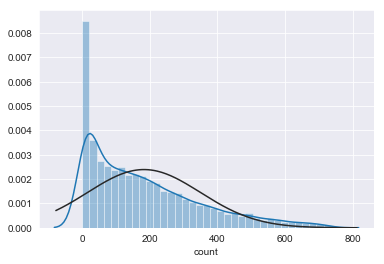

In [27]:
sns.distplot(train_2['count'] , fit=norm)
train_2['count'].skew()

0.913778357623041

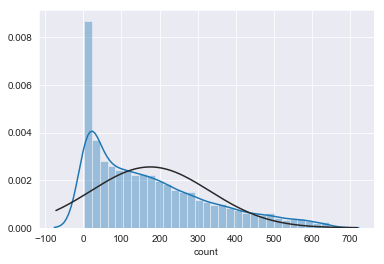

In [28]:
sns.distplot(train_3['count'] , fit=norm)
train_3['count'].skew()

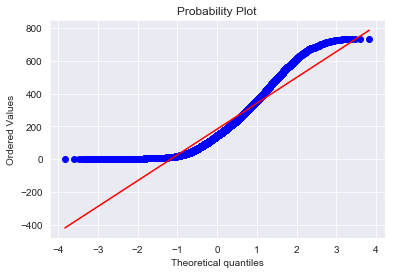

In [29]:
fig = plt.figure()
res = stats.probplot(train_2['count'], plot=plt)
plt.show()

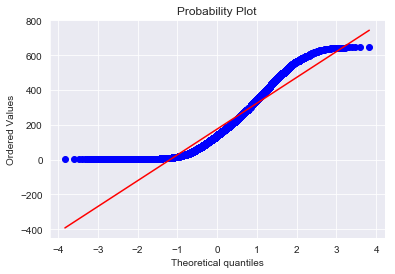

In [30]:
fig = plt.figure()
res = stats.probplot(train_3['count'], plot=plt)
plt.show()

### count 변수에 log 취하기(residual 보기전까지 보류-?)

-0.8514116321738531

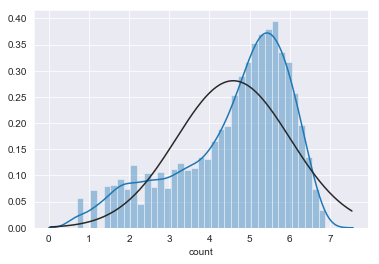

In [31]:
train["count"] = np.log1p(train["count"])
sns.distplot(train['count'] , fit=norm);
train['count'].skew()
# 이걸로 될려나,,,?

In [68]:
train["count"] = np.expm1(train["count"])

-0.4925945750402873

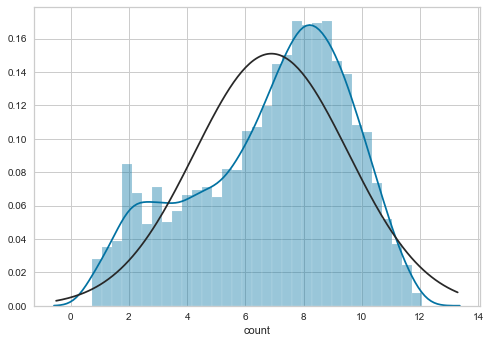

In [80]:
from scipy.special import boxcox1p
train["count"] = boxcox1p(train["count"], 0.15)
sns.distplot(train['count'] , fit=norm);
train['count'].skew()

In [34]:
# outlier 제거 
# residual 의 분포도를 봐라..... -> 모델나오면 .... 잔차들의 정규분포가 중요함.
# target에 log는 취하지말고 일단 돌려보기, 잔차들간의 정규분포 안따르면 앞에서 다시 해결해주어야 할 문제.ㅠ

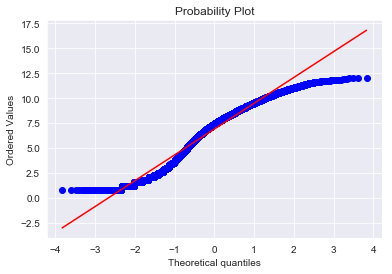

In [35]:
fig = plt.figure()
res = stats.probplot(train['count'], plot=plt)
plt.show()

In [36]:
feature_2 = train_2.drop(['datetime','count'],1)
feature_3 = train_3.drop(['datetime','count'],1)

In [60]:
feature = train.drop(['datetime','count'],1)

In [37]:
test = test.drop(['datetime'],1)

In [38]:
feature_2.isnull().sum() #결측치 없음 확인

season             0
holiday            0
workingday         0
weather            0
temp               0
humidity           0
windspeed          0
time               0
month              0
windspeed_categ    0
dtype: int64

### label VS one-hot encoding
- label : 수치에 있어 선후관계 유의미할 경우. (서열이 있는 경우)
- one-hot : season / holiday / workingday / weather / month 
- windspeed_categ : label encoding 
- time -> int

(holiday / working day 는 어차피 class 두개이므로 굳이 안해줘도 됨)

In [39]:
feature_2.dtypes

season               int64
holiday              int64
workingday           int64
weather              int64
temp               float64
humidity             int64
windspeed          float64
time                 int64
month                int64
windspeed_categ      int64
dtype: object

In [40]:
feature_2['season'] = feature_2['season'].apply(str)
feature_2['weather'] = feature_2['weather'].apply(str)
feature_2['month'] = feature_2['month'].apply(str)

feature_3['season'] = feature_3['season'].apply(str)
feature_3['weather'] = feature_3['weather'].apply(str)
feature_3['month'] = feature_3['month'].apply(str)

In [61]:
feature['season'] = feature['season'].apply(str)
feature['weather'] = feature['weather'].apply(str)
feature['month'] = feature['month'].apply(str)

In [41]:
# test data도 진행
test['season'] = test['season'].apply(str)
test['holiday'] = test['holiday'].apply(str)
test['month'] = test['month'].apply(str)

In [42]:
feature_2.dtypes

season              object
holiday              int64
workingday           int64
weather             object
temp               float64
humidity             int64
windspeed          float64
time                 int64
month               object
windspeed_categ      int64
dtype: object

In [43]:
pd.set_option('max_columns', 100)

In [44]:
feature_2 = pd.get_dummies(feature_2,columns=['season','weather','month']) # one-hot
feature_3 = pd.get_dummies(feature_3,columns=['season','weather','month']) 

In [62]:
feature = pd.get_dummies(feature,columns=['season','weather','month'])

In [45]:
test = pd.get_dummies(test,columns=['season','weather','month']) # one-hot

In [46]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder() 
lbl.fit(list(feature_2['windspeed_categ'].values)) 
feature_2['windspeed_categ'] = lbl.transform(list(feature_2['windspeed_categ'].values))
lbl.fit(list(feature_3['windspeed_categ'].values)) 
feature_3['windspeed_categ'] = lbl.transform(list(feature_3['windspeed_categ'].values))

In [63]:
feature['windspeed_categ'] = lbl.transform(list(feature['windspeed_categ'].values))

In [47]:
test['windspeed_categ'] = lbl.transform(list(test['windspeed_categ'].values))

In [48]:
feature_2.head(10)

,holiday,workingday,temp,humidity,windspeed,time,windspeed_categ,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0,0,9.840,81,0.000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,9.020,80,0.000,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,9.020,80,0.000,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,9.840,75,0.000,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,9.840,75,0.000,4,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,9.840,75,6.003,5,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,9.020,80,0.000,6,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,8.200,86,0.000,7,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,9.840,75,0.000,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,13.120,76,0.000,9,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [49]:
### ???? 뭐가달라진거지
feature_2['windspeed_categ'].unique()

array([0, 1, 3, 2])

### Scaling
* 스케일링은 데이터 전처리 과정으로 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.
* 즉, 각 독립변수의 그 범위가 다르므로 모든 독립변수가 평균 0 분산 1이 되게끔 처리해주는 과정

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_feature_2 = sc.fit_transform(feature_2)
sc_feature_3 = sc.fit_transform(feature_3)

In [64]:
sc_feature = sc.fit_transform(feature)

In [51]:
sc_feature_2

array([[-0.17269497, -1.44703872, -1.32316203, ..., -0.30171039,
        -0.30023846, -0.29876169],
       [-0.17269497, -1.44703872, -1.42859831, ..., -0.30171039,
        -0.30023846, -0.29876169],
       [-0.17269497, -1.44703872, -1.42859831, ..., -0.30171039,
        -0.30023846, -0.29876169],
       ...,
       [-0.17269497,  0.69106651, -0.79598061, ..., -0.30171039,
        -0.30023846, -0.29876169],
       [-0.17269497,  0.69106651, -0.79598061, ..., -0.30171039,
        -0.30023846, -0.29876169],
       [-0.17269497,  0.69106651, -0.9014169 , ..., -0.30171039,
        -0.30023846, -0.29876169]])

In [52]:
sc_test = sc.fit_transform(test)

### Modeling
- 1. Linear Regression Model
- 2. Tree Based Model (decision tree / XGBoost)

### 1. Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
linear_model = LinearRegression()
grid_linear = GridSearchCV(linear_model, parameters, cv=5, verbose=1 , scoring ='neg_mean_squared_error')
grid_linear.fit(sc_feature,train['count'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [89]:
grid_linear.best_estimator_

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [82]:
from yellowbrick.regressor import ResidualsPlot

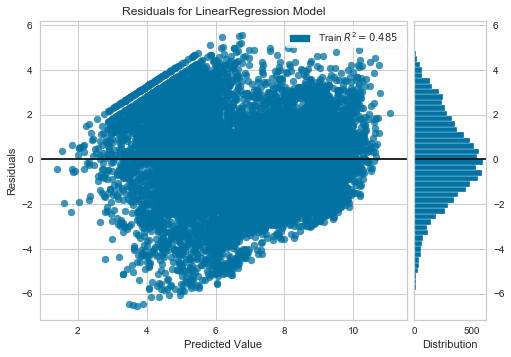

In [83]:
visualizer = ResidualsPlot(linear_model)
visualizer.fit(feature,train['count'])
visualizer.poof()

In [67]:
len(feature)

10886

In [74]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.840,14.395,81,0.000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.020,13.635,80,0.000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.020,13.635,80,0.000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.840,14.395,75,0.000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.840,14.395,75,0.000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.840,12.880,75,6.003,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.020,13.635,80,0.000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.200,12.880,86,0.000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.840,14.395,75,0.000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.120,17.425,76,0.000,8,6,14
